<a href="https://colab.research.google.com/gist/tyty9798123/f302c49c7154e98c52067822e08ede89/experiment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [19]:
import numpy as np
import pandas as pd
import os

import time
import datetime
import glob

import warnings
warnings.filterwarnings("ignore")

from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6.4, 4.8)
plt.rcParams["figure.dpi"] = 300
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import BaggingClassifier

import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Data Preprocessing

## Load Data

In [20]:
dataset = pd.read_csv('/Users/emmamorrow25/Penn State SENIOR YEAR (SU2025-SPR2026)/DS 340W/research_project/stock_price_movement_prediction_new/processed_2020_with_1200_14.csv')

In [21]:
dataset.head()

,Unnamed: 0,Date,day_of_the_week,positive_percent_pre_market,positive_percent_55_135,positive_percent_55_95,positive_percent_95_135,positive_percent_after_market,positive_percent_yesterday_market,positive_percent_the_day_before_yesterday,Prev Open,Prev Close,Prev High,Prev Low,Prev HLPCT,Prev Volume,Prev Change Percent,Prev Trade Value,Prev VWAP,percentage_change
0,0,2022-03-07,1,-0.115521,-0.130575,-0.134206,-0.129156,-0.126248,-0.101695,-0.123814,431.75,432.17,433.37,427.88,0.012831,113973677,0.000973,49115793000,430.4263,-0.017101
1,1,2022-03-04,5,-0.174812,-0.137373,-0.148973,-0.134105,-0.140736,-0.112743,-0.091533,440.47,435.71,441.11,433.80,0.016851,104071597,-0.010807,45503370900,436.7508,-0.005745
2,2,2022-03-03,4,-0.093572,-0.104905,-0.136905,-0.088174,-0.107054,-0.084201,-0.108293,432.37,437.89,439.72,431.57,0.018885,117541703,0.012767,51464518900,436.4746,-0.009310
3,3,2022-03-02,3,-0.089150,-0.090783,-0.122835,-0.081741,-0.110207,-0.122380,-0.094917,435.04,429.98,437.17,427.11,0.023554,137521230,-0.011631,59419576700,430.9464,0.010916
4,4,2022-03-01,2,-0.111683,-0.100906,-0.102787,-0.099907,-0.073895,-0.094333,-0.135854,432.03,436.63,438.20,430.70,0.017414,145302843,0.010647,63089900500,434.0840,-0.012091



## Generate the data before training.

In [22]:
# Delete
dataset = dataset.drop(
    [
     #'sentiment_number_24hr',
     #'positive_percent_yesterday_market',
     #'Prev Open',
     #'Prev Close',
     #'Prev High',
     #'positive_percent_the_day_before_yesterday', #c
     #'Prev Low',
     #'Prev Volume',
     #'Prev Trade Value',
     'Prev VWAP',#c
     #'positive_percent_pre_market',
     'positive_percent_55_95',
     'positive_percent_55_135',
     'positive_percent_the_day_before_yesterday',
     'positive_percent_95_135',
     #'positive_percent_after_market',
     #'positive_percent_yesterday_market',
     'Prev HLPCT',#c
     #'Premarket Changed'
     #'positive_percent_55_135'#c,
     #"positive_percent_pre_market",
     #"positive_percent_after_market",
     #"positive_percent_yesterday_market"
    ],
    axis=1
)


dataset = dataset.drop(
    [
     'Unnamed: 0',
     #'day_of_the_week',
    ],
    axis=1
)
dataset["percentage_change"] = dataset["percentage_change"] * 100

days_of_week = pd.get_dummies(dataset.day_of_the_week)
dataset = pd.concat([dataset, days_of_week], axis=1)
temp_percentage_change = dataset["percentage_change"]
dataset = dataset.drop(["percentage_change"], axis=1)
dataset["percentage_change"] = temp_percentage_change
dataset = dataset.drop(['day_of_the_week'], axis=1)
dataset = dataset.drop(
    [
     1, 
     2, 
     3, 
     4, 
     5
    ],
    axis=1
)
end_index = dataset[dataset['Date']=='2022-02-28'].index[0]
start_testing_index = (len(dataset.index) - dataset[dataset['Date']=='2021-04-05'].index[0]) - 1
dataset = dataset[end_index:]
dataset = dataset.iloc[::-1]
print("End Index", end_index)
print("Start Testing Index", start_testing_index)
print(dataset.shape)
dataset

End Index 5
Start Testing Index 253
(482, 12)


,Date,positive_percent_pre_market,positive_percent_after_market,positive_percent_yesterday_market,Prev Open,Prev Close,Prev High,Prev Low,Prev Volume,Prev Change Percent,Prev Trade Value,percentage_change
486,2020-04-01,-0.134855,-0.134700,-0.145378,253.9005,251.1623,256.5997,249.6715,193290928,-0.010785,49731996200,0.322646
485,2020-04-02,-0.198980,-0.140897,-0.142982,241.6421,239.8588,251.0738,237.6663,188373330,-0.007380,46454886300,2.281811
484,2020-04-03,-0.189400,-0.128052,-0.151454,238.9234,245.3937,246.2219,238.3387,176669824,0.027081,43613280900,-1.006222
483,2020-04-06,-0.115970,-0.143818,-0.181747,244.3510,241.8467,246.8456,238.9526,134538553,-0.010249,33050036600,1.147776
482,2020-04-07,-0.101322,-0.102104,-0.116928,251.2500,258.0906,260.1759,241.8270,186692564,0.027226,48044974900,-1.000146
...,...,...,...,...,...,...,...,...,...,...,...,...
9,2022-02-22,-0.127823,-0.136974,-0.167445,437.3300,434.2300,438.6600,431.8200,132414754,-0.007088,57720378000,-0.159655
8,2022-02-23,-0.123596,-0.119155,-0.109571,431.8900,429.5700,435.5000,425.8600,124054581,-0.005372,53384444100,-0.882972
7,2022-02-24,-0.153915,-0.144759,-0.135680,432.6600,421.9500,433.2600,421.3500,131884132,-0.024754,56332708600,1.861133
6,2022-02-25,-0.107367,-0.108611,-0.112070,411.0200,428.3000,428.7600,410.6400,213444305,0.042042,89499945200,1.659722


# Training

In [23]:
dataset.drop(["Date"], inplace=True, axis=1)
X, y = np.hsplit( dataset.to_numpy(), [-1])
_y = np.array(y>=0, dtype=int)

## Rolling Window

In [ ]:
def movement_data(X, y, current, n):
  X_train = X[current-n:current]
  y_train = y[current-n:current]
  
  X_test = X[current]
  y_test = y[current]
  return (X_train, np.array([X_test]), y_train, np.array([y_test]))

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import RobustScaler

history = []
history_w = []
history_score = []
range__ = [i for i in range(232, start_testing_index+1) if i % 2 == 0]

best_score = 0
best_n = 0
print(range__)
pred_his = []
c = 1
g = 'scale'
for i in range__:
  n=i
  score = 0
  count = 0
  preds = []
  while(True):
    try:
      start_num = n + count
      print(start_num, n)
      
      X_train, X_test, y_train, y_test = movement_data(X, _y, start_num, n)
      X_train, y_train = SMOTE(random_state=0, k_neighbors=5).fit_resample(X_train, y_train)
      #標準化
      #scaler = StandardScaler()
      scaler = RobustScaler()
      scaler.fit(X_train) 
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)

      #訓練      
      bagging_clf = BaggingClassifier(
          SVC(C=c, gamma=g),
          n_estimators=100,
          bootstrap=True,
          oob_score=False,
          n_jobs=-1,
          random_state=0
      ).fit(X_train, y_train)
      #計算分數 0 or 1
      pred = bagging_clf.predict(X_test)[0]
      preds.append(pred)
      real = y_test[0][0]

      count+=1
      #答對
      if pred == real:
        score+=1
      #print("Score:", score)
      history.append(
          score / count
      )
      print(score / count)
    except Exception as e:
      print("ERROR: ", e)
      break
  pred_his.append(preds)
  if count>0:
    if (score/count) > best_score:
      best_score = score/count
      best_n = n
      best_c = c
      best_g = g
    history_w.append(n)
    history_score.append(score / count)
    print("N:", n)
    print("Current Accuracy:", score / count)
    print("Best N:", best_n)
    print("Best Score:", best_score)

[232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252]
232 232
1.0
233 232
0.5
234 232
0.6666666666666666
235 232
0.75
236 232
0.8
237 232
0.8333333333333334
238 232
0.7142857142857143
239 232
0.75
240 232
0.7777777777777778
241 232
0.8
242 232
0.7272727272727273
243 232
0.75
244 232
0.7692307692307693
245 232
0.7142857142857143
246 232
0.7333333333333333
247 232
0.75
248 232
0.7647058823529411
249 232
0.7777777777777778
250 232
0.7368421052631579
251 232
0.7
252 232
0.7142857142857143
253 232
0.7272727272727273
254 232
0.7391304347826086
255 232
0.7083333333333334
256 232
0.72
257 232
0.6923076923076923
258 232
0.7037037037037037
259 232
0.6785714285714286
260 232
0.6551724137931034
261 232
0.6666666666666666
262 232
0.6451612903225806
263 232
0.625
264 232
0.6060606060606061
265 232
0.6176470588235294
266 232
0.6285714285714286
267 232
0.6388888888888888
268 232
0.6486486486486487
269 232
0.631578947368421
270 232
0.6410256410256411
271 232
0.65
272 232
0.6585365853658537
273 232
0.

In [26]:
f1_scores = []
for his in pred_his:
  labels = _y[start_testing_index:]
  preds = his[-(len(dataset)-start_testing_index):]
  print( "F1 Score:", f1_score(labels, preds) )
  f1_scores.append(f1_score(labels, preds))

F1 Score: 0.636734693877551
F1 Score: 0.6108786610878661
F1 Score: 0.631578947368421
F1 Score: 0.6530612244897959
F1 Score: 0.6141078838174274
F1 Score: 0.5787234042553191
F1 Score: 0.5948275862068966
F1 Score: 0.6297872340425532
F1 Score: 0.5833333333333334
F1 Score: 0.6016949152542372
F1 Score: 0.5991561181434599


In [27]:
sum(f1_scores) / len(f1_scores)

0.6121712728978964

<Axes: ylabel='Frequency'>

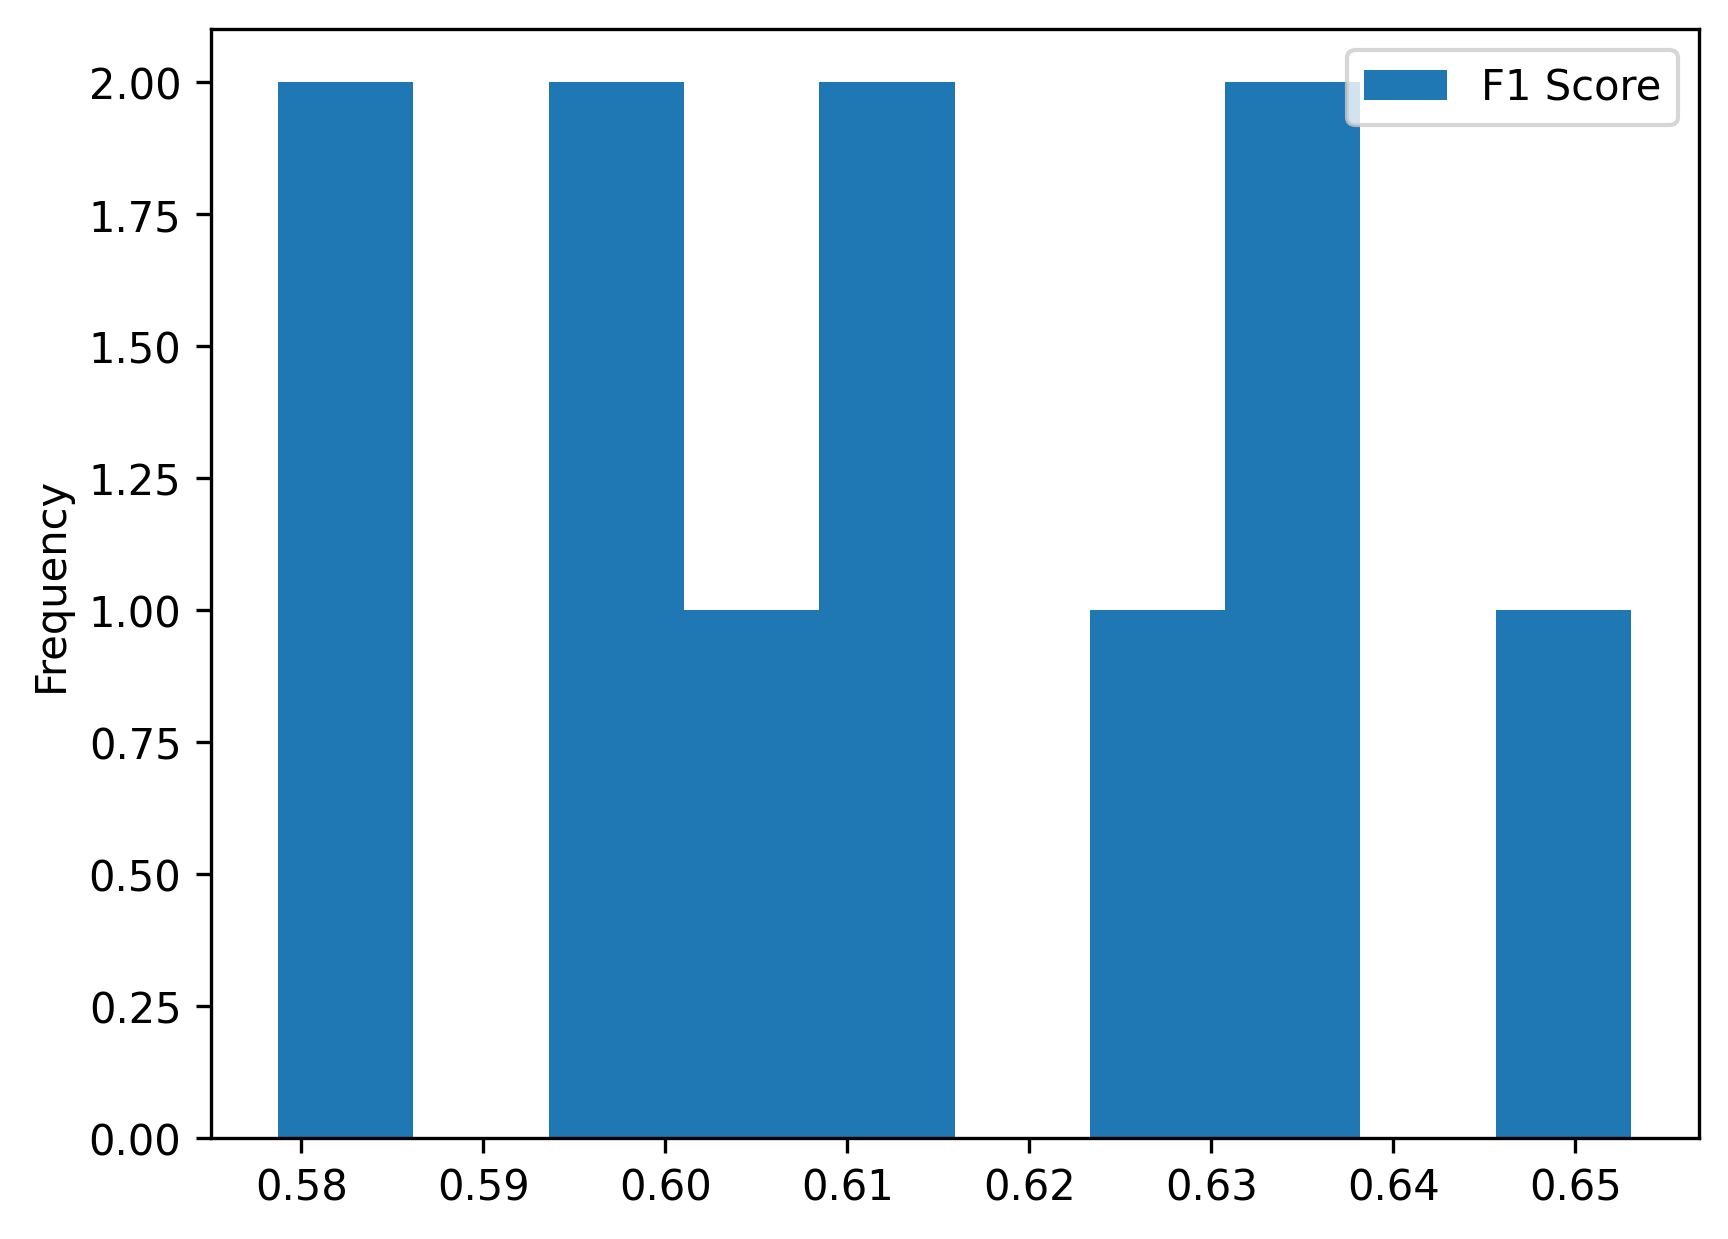

In [28]:
d = pd.DataFrame()
d["Window Size"] = [str(i) for i in range__]
d["F1 Score"] = f1_scores
d.plot(x="Window Size", y="F1 Score", kind="hist") 

<Axes: xlabel='Window Size'>

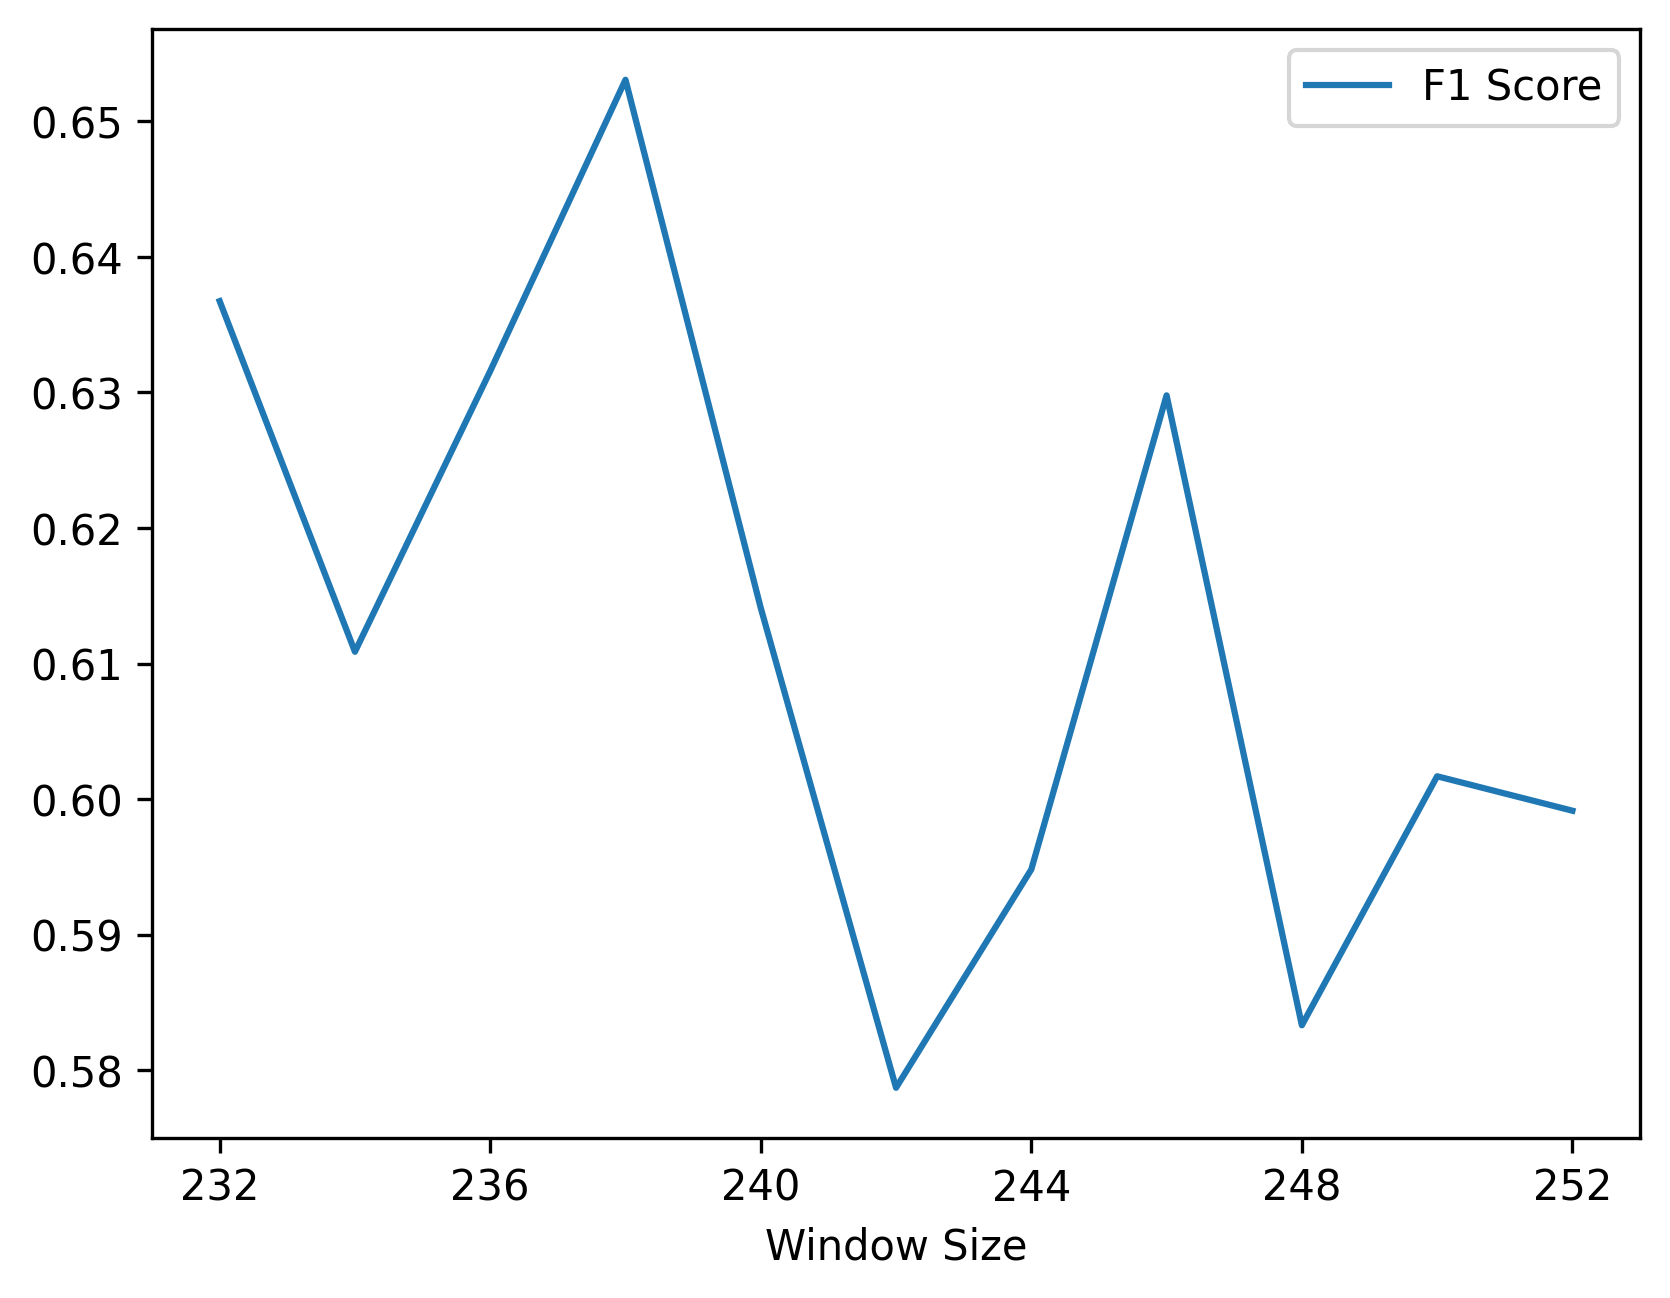

In [29]:
d.plot(x="Window Size", y="F1 Score", kind="line") 

## Confusion Matrix

In [14]:
start = start_testing_index

_y = _y[start:]
preds = preds[- ( len(X) - start ):]
print( confusion_matrix(_y, preds) )
print( "Accuracy Score:", accuracy_score(_y, preds) )
print( "Precision Score:", precision_score(_y, preds) )
print( "Recall Score:", recall_score(_y, preds) )
print( "F1 Score:", f1_score(_y, preds) )

[[63 46]
 [49 71]]
Accuracy Score: 0.5851528384279476
Precision Score: 0.6068376068376068
Recall Score: 0.5916666666666667
F1 Score: 0.5991561181434599
